<a href="https://colab.research.google.com/github/Mohini1733/Major_Project/blob/main/imdb_rating.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

In [3]:
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/biocreative_ppi.zip.
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown.zip.
[nltk_data]    | Downloading package brown_tei to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown_tei.zip.
[nltk_data]    | Downloading package cess_cat to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cess_cat.zip.
[nltk_data]    | Downloading package cess_esp to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cess_esp.zip.
[nltk_data]    | Downloading package chat80 to /root/nltk_data...
[nltk_data]    |   Unzipp

True

In [4]:
path = 'https://github.com/Mohini1733/Major_Project/blob/main/IMDB%20Dataset.csv'
df = pd.read_csv(path)
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [5]:
df['sentiment'].value_counts()

negative    25000
positive    25000
Name: sentiment, dtype: int64

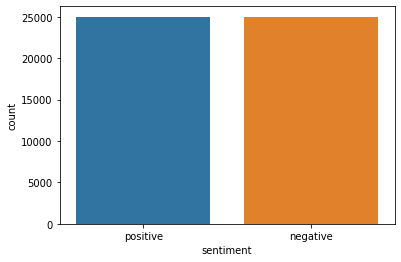

In [6]:
sns.countplot(x = df['sentiment'])

In [7]:
df.drop(df.tail(10000).index,
        inplace = True)

In [8]:
df.sentiment.value_counts()

negative    20007
positive    19993
Name: sentiment, dtype: int64

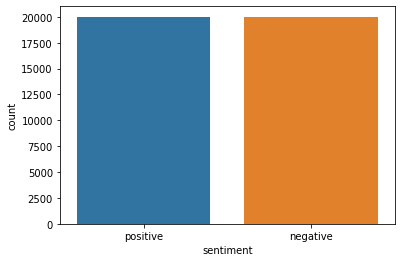

In [9]:
sns.countplot(x = df['sentiment'])

In [10]:
import re
stop_words = stopwords.words('english')
len(stop_words)
negative_words=['no','not',"don't","aren't","couldn't","didn't","doesn't","hadn't","hasn't","haven't","isn't","mightn't","mustn't","needn't","shouldn't","wasn't","weren't","won't","wouldn't"]
for negative_word in negative_words:
  stop_words.remove(negative_word)

len(stop_words)
    
REPLACE_BY_SPACE_RE = re.compile('[/(){}—[]|@,;‘?|।!-॥–’-]')

def clean_text(sample):
  sample = sample.lower()
  sample = sample.replace("<br /><br />", "")
  sample = REPLACE_BY_SPACE_RE.sub(' ', sample)
  sample = re.sub("[^a-z]+", " ", sample)
  sample = re.sub("[0-9]", " ",sample)
  sample = sample.split(" ")
  sample = [word for word in sample if word not in stop_words ]
  sample = " ".join(sample)
  return sample 

In [11]:
ps = PorterStemmer()
filter_review = []
for sentence in df['review']:
  filter_sentence = []
  sentence = sentence.replace('<br /><br />',' ')
  sentence = re.sub('[^a-zA-Z]',' ',sentence)
  sentence = sentence.lower()
  for word in nltk.word_tokenize(sentence):
    if word not in stopwords.words('english'):
      filter_sentence.append(ps.stem(word))
  filter_sentence = ' '.join(word for word in filter_sentence)
  filter_review.append(filter_sentence)

In [12]:
x = np.array(filter_review)
type(x)

numpy.ndarray

In [13]:
tf = TfidfVectorizer()
from sklearn.svm import SVC

In [14]:
y = df['sentiment'].values
y = np.array(y)

In [15]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=0)

In [ ]:
'''x_train = tf.fit_transform(x_train)
x_test = tf.transform(x_test)'''


'x_train = tf.fit_transform(x_train)\nx_test = tf.transform(x_test)'

In [ ]:
'''from sklearn.svm import SVC
sv = SVC()
sv.fit(x_train,y_train)
y_pred = sv.predict(x_test)
y_pred'''

'from sklearn.svm import SVC\nsv = SVC()\nsv.fit(x_train,y_train)\ny_pred = sv.predict(x_test)\ny_pred'

In [ ]:
'''from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
accuracy_score(y_pred,y_test)*100'''

'from sklearn.metrics import accuracy_score,confusion_matrix,classification_report\naccuracy_score(y_pred,y_test)*100'

In [16]:
from sklearn.pipeline import Pipeline
text_model = Pipeline([('vect',TfidfVectorizer()),('model',SVC())])

In [17]:
text_model.fit(x_train,y_train)

Pipeline(memory=None,
         steps=[('vect',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('model',
                 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', de

In [18]:
y_pred = text_model.predict(x_test)
y_pred[:10]

array(['positive', 'positive', 'negative', 'negative', 'positive',
       'negative', 'positive', 'negative', 'negative', 'positive'],
      dtype=object)

In [19]:
y_test[:10]

array(['positive', 'positive', 'negative', 'negative', 'positive',
       'negative', 'positive', 'negative', 'negative', 'positive'],
      dtype=object)

In [20]:
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix
accuracy_score(y_pred,y_test)

0.8925

In [21]:
confusion_matrix(y_pred,y_test)

array([[4468,  444],
       [ 631, 4457]])

In [22]:
classification_report(y_pred,y_test)

'              precision    recall  f1-score   support\n\n    negative       0.88      0.91      0.89      4912\n    positive       0.91      0.88      0.89      5088\n\n    accuracy                           0.89     10000\n   macro avg       0.89      0.89      0.89     10000\nweighted avg       0.89      0.89      0.89     10000\n'

In [23]:
import joblib
joblib.dump(text_model,'imdb-rating' )

['imdb-rating']

In [28]:
!pip install pyngrok==4.1.1 
!pip install streamlit 

In [29]:
from pyngrok import ngrok


In [31]:
%%writefile app.py
import streamlit as st
import joblib
import base64
st.set_page_config(layout="wide")
st.markdown("""
<style>
.big-font {
    font-size;50px  !important;
    font-family:Arial;
    color:#D5C4C4; 

}
</style>
""", unsafe_allow_html=True)

st.markdown("""
<style>
.big-font {
    font-size;20px  !important;
    font-family:Courier;
    color:#D5C4C4; 
}
</style>
""", unsafe_allow_html=True)

st.markdown('<p class="big-font">IMDB Review Sentiment Analysis !!</p>',
            unsafe_allow_html=True)

st.markdown('<p class="medium-font">Enter your review!</p>', 
            unsafe_allow_html=True)

review= st.text_input("here")
model=joblib.load('imdb-rating')

op=model.predict([review])

if st.button('Analyse'):
  st.markdown(f'<p class="medium-font">The Review is {op[0]} </p>',
              unsafe_allow_html=True)

Writing app.py


In [32]:
!nohup streamlit run app.py &
url=ngrok.connect(port='8501')
url

nohup: appending output to 'nohup.out'


2021-06-10 04:47:29.523 INFO    pyngrok.process: ngrok process starting: 1134
2021-06-10 04:47:29.559 INFO    pyngrok.process: t=2021-06-10T04:47:29+0000 lvl=info msg="no configuration paths supplied"

2021-06-10 04:47:29.562 INFO    pyngrok.process: t=2021-06-10T04:47:29+0000 lvl=info msg="using configuration at default config path" path=/root/.ngrok2/ngrok.yml

2021-06-10 04:47:29.575 INFO    pyngrok.process: t=2021-06-10T04:47:29+0000 lvl=info msg="open config file" path=/root/.ngrok2/ngrok.yml err=nil

2021-06-10 04:47:29.579 INFO    pyngrok.process: t=2021-06-10T04:47:29+0000 lvl=info msg="starting web service" obj=web addr=127.0.0.1:4040

2021-06-10 04:47:29.851 INFO    pyngrok.process: t=2021-06-10T04:47:29+0000 lvl=info msg="tunnel session started" obj=tunnels.session

2021-06-10 04:47:29.854 INFO    pyngrok.process: t=2021-06-10T04:47:29+0000 lvl=info msg="client session established" obj=csess id=aa23cd46422d

2021-06-10 04:47:29.859 INFO    pyngrok.process: ngrok process has 

'http://dc281812c285.ngrok.io'